# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.

- Check for missing values and report the number and percentage of missing data for each column.

- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

- Generate bar plots for at least three categorical columns and discuss the frequency distributions.

- Identify outliers in at least one numerical column using boxplots.

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
16732   32           Private  462255     Bachelors             13   
19234   26           Private  213081       HS-grad              9   
8483    32           Private  107417       HS-grad              9   
1028    48           Private  207848          10th              6   
74      79           Private  124744  Some-college             10   
21327   27           Private  101618       HS-grad              9   
8010    41         State-gov  227734       HS-grad              9   
31029   31           Private  218322  Some-college             10   
2528    47  Self-emp-not-inc  102359     Bachelors             13   
11668   28           Private  337378       HS-grad              9   

           marital-status       occupation    relationship   race     sex  \
16732            Divorced  Exec-managerial   Not-in-family  White  Female   
19234       Never-married     Adm-clerical       Unmarried  Black  Female   
8483        Never-married    Other-service   Not-in-family  White    Male   
1028   Married-civ-spouse     Adm-clerical            Wife  White  Female   
74     Married-civ-spouse   Prof-specialty  Other-relative  White    Male   
21327  Married-civ-spouse  Exec-managerial         Husband  White    Male   
8010   Married-civ-spouse     Adm-clerical         Husband  White    Male   
31029       Never-married    Other-service   Not-in-family  White    Male   
2528   Married-civ-spouse  Exec-managerial         Husband  White    Male   
11668  Married-civ-spouse     Craft-repair         Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country income  
16732             0             0              40  United-States  <=50K  
19234             0             0              40        Jamaica  <=50K  
8483              0             0              37  United-States  <=50K  
1028              0             0              40  United-States  <=50K  
74                0             0              20  United-States  <=50K  
21327             0             0              50  United-States  <=50K  
8010           3464             0              40  United-States  <=50K  
31029             0             0              30  United-States  <=50K  
2528              0             0              30  United-States  <=50K  
11668             0             0              40  United-States  <=50K

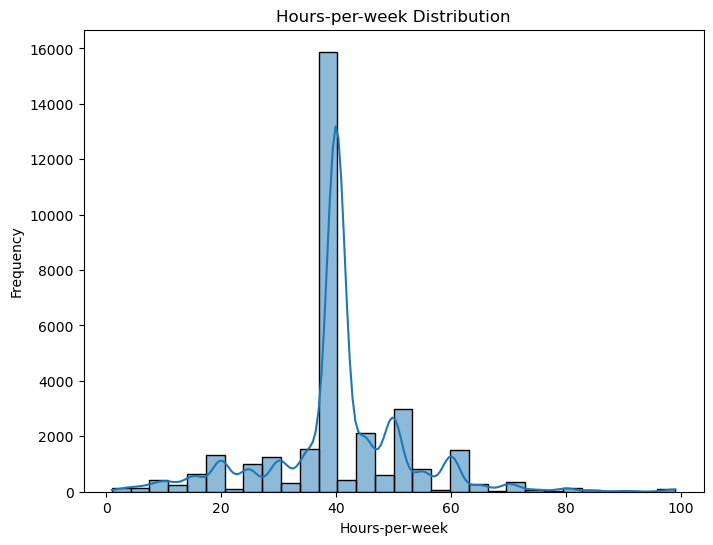

In [3]:
# Analyze hours-per-week target distribution
  # Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

# Histogram for hours-per-week
plt.figure(figsize=(8, 6))
sns.histplot(data['hours-per-week'], kde=True, bins=30)
plt.title('Hours-per-week Distribution')
plt.xlabel('Hours-per-week')
plt.ylabel('Frequency')
plt.show()

C:\Users\Alexandra Bande\AppData\Local\Temp\ipykernel_9856\2127655764.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['hours-per-week'], shade=True, color="blue")


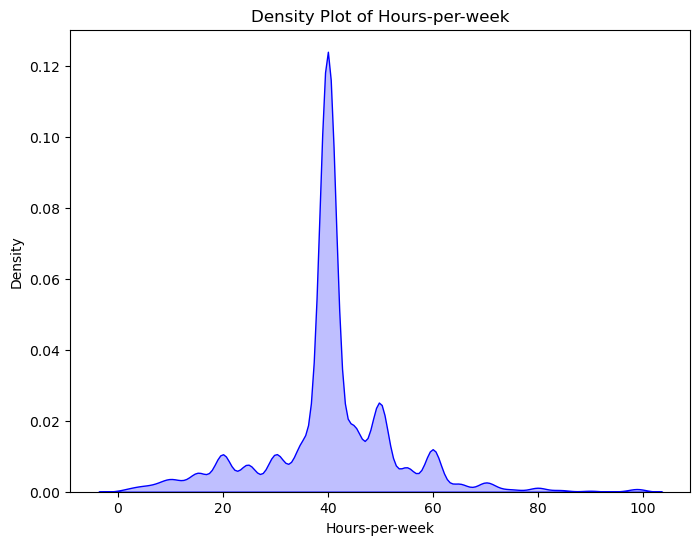

In [4]:
# Density plot for hours-per-week
plt.figure(figsize=(8, 6))
sns.kdeplot(data['hours-per-week'], shade=True, color="blue")
plt.title('Density Plot of Hours-per-week')
plt.xlabel('Hours-per-week')
plt.ylabel('Density')
plt.show()

Here's an analysis of the histogram, considering distribution, outliers, and skewness:

 - Distribution: The distribution of hours per week is multimodal and centered around a value of 40. While there is a clear peak around 40 hours-per-week, there are other noticeable peaks, particularly around 20 and 50-60 hours-per-week.
 - Outliers: There are a few outliers at the upper end of the distribution, with people working more than 80 hours per week. This indicates that some individuals are working significantly more hours than the majority.
 - Skewness: The distribution appears to be skewed to the right (positive skew). This means there's a longer tail on the right side of the distribution, indicating that there are more people working above the average hours per week than people working below the average.

In [5]:
# Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation.
# Summary statistics
continuous_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
descriptive_stats = data[continuous_columns].agg(['mean', 'median', 'std'])
descriptive_stats.index = ['Mean', 'Median', 'Std Dev']
# Adăugarea descrierii pentru statistici descriptive (folosind describe())
descriptive_full = data[continuous_columns].describe()

# Afișează și statistica completă
print("\nFull Descriptive Statistics (describe):\n", descriptive_full)


Full Descriptive Statistics (describe):
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [6]:
# Check for missing values and report the number and percentage of missing data for each column.
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print("Missing Values Report:\n", missing_report)

Missing Values Report:
                 Missing Values  Percentage
age                          0         0.0
workclass                    0         0.0
fnlwgt                       0         0.0
education                    0         0.0
education-num                0         0.0
marital-status               0         0.0
occupation                   0         0.0
relationship                 0         0.0
race                         0         0.0
sex                          0         0.0
capital-gain                 0         0.0
capital-loss                 0         0.0
hours-per-week               0         0.0
native-country               0         0.0
income                       0         0.0


There are no missing values on the dataset.

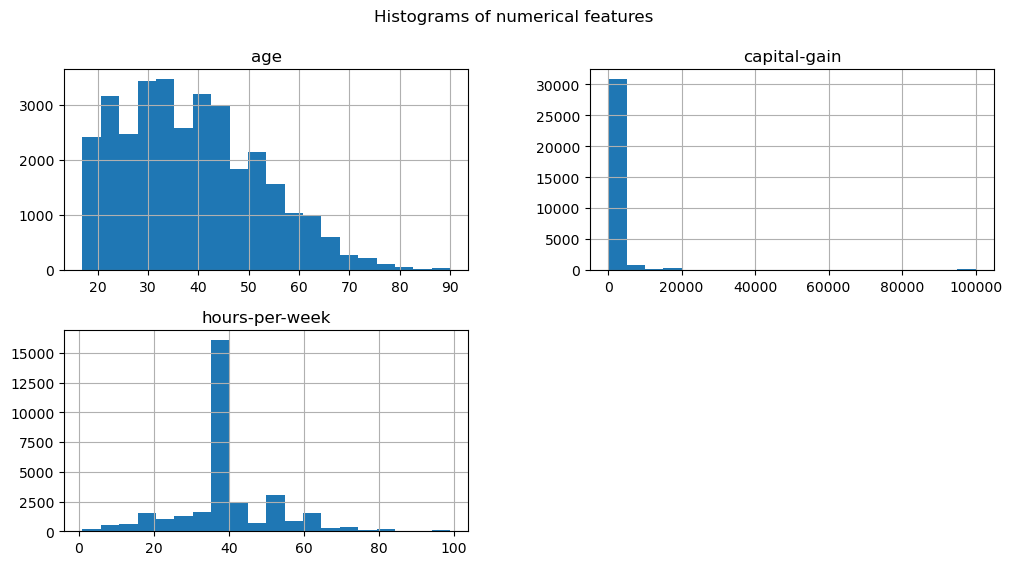

In [7]:
# Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

# Histograms for numerical columns
numerical_columns = ["age", "capital-gain", "hours-per-week"]
data[numerical_columns].hist(bins=20, figsize=(12, 6))
plt.suptitle("Histograms of numerical features")
plt.show()

Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality.

Discussion about skewness

Regarding the age variable, the plot shows a right-skewed distribution, with more individuals concentrated in the younger age groups and fewer in the older age groups.
It rises to a peak around the late 20s to mid 30s, then gradually decreases.
Given the general shape, it has positive skewness.
The bulk of the population is in the 20-40 age range, with a decreasing number of people as age increases.

From the perspective of capital-gain, this distribution is right skewed.
The majority of individuals report zero capital gains, while a small number report high values
This suggests an asimmetrical distribution.

As for the hours-per-week variable, the distribution appears right-skewed. 
While the major concentration is at 40, there's a longer tail extending towards higher numbers of hours worked.

Discussion about modality

For the age variable, the distribution is multimodal, with multiple peaks highlighting the data, around the 20-40 year range.

The capital-gain variable pesents a unimodal distribution, suggesting that most values are concentrated around the value 0, meaning there is a single distinct peak, indicating a predominant or frequently occurring value in the dataset.

The "hours-per-week" variable also displays a multimodal distribution, with a very pronounced peak at about 40 hours per week and smaller peaks visible, particularly around 20 hours and 50 hours.

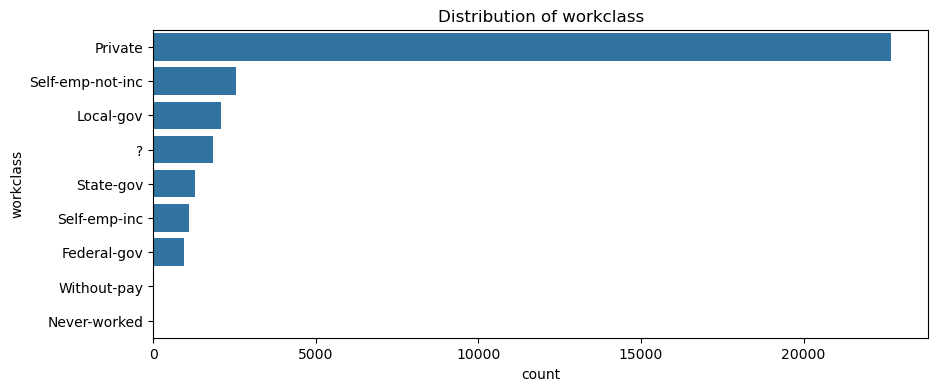

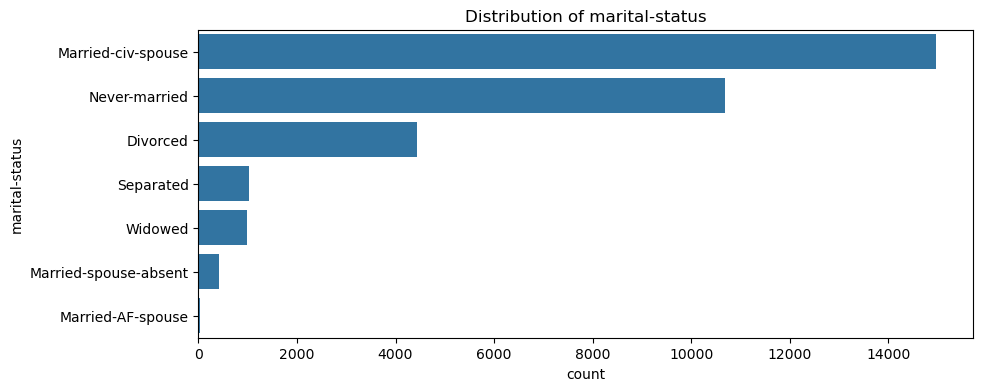

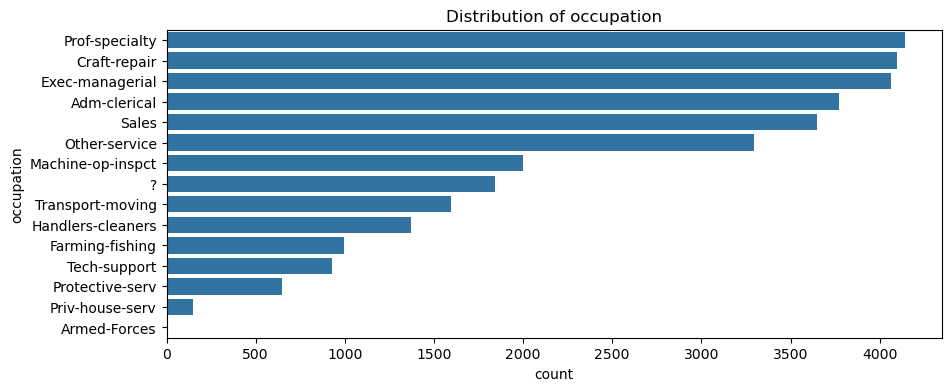

In [8]:
# Generate bar plots for at least three categorical columns and discuss the frequency distributions.

# Bar plots for categorical columns
categorical_columns = ["workclass", "marital-status", "occupation"]
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()

 Discussion about frequency distributions.

Workclass: The most common job type in this dataset is from the private sector, with a large portion of respondents working in this sector (over 2000 individuals). The second most frequent sector is self-emp-not-inc, followed by local-gov. The least common categories are never-worked.

Marital-status: The majority of respondents fall into the married-civ-spouse category, followed by never-married (over 14000 individuals). The least frequent marital status categories are married-AF-spouse and married-spouse-absent.

Occupation: The most common occupations include prof-specialty, craft-repair, and exec-managerial (aprox  4000 individuals), with a small difference in popularity between them. The rarest occupations in the dataset are armed-forces and priv-house-serv (under 5000 individuals).

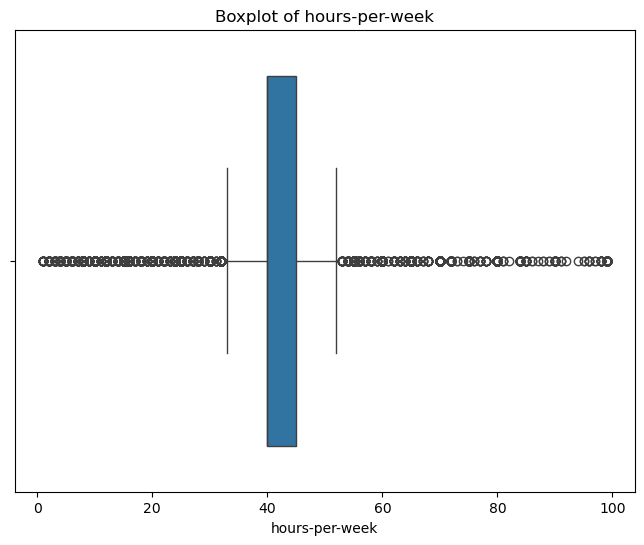

In [9]:
# Identify outliers in at least one numerical column using boxplots.
# Identify outliers for hours-per-week variable 
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['hours-per-week'])
plt.title("Boxplot of hours-per-week")
plt.show()

As can be seen with this variable, outliers are present both at the lower limits (0-30 working hours) and at the upper limits (50-100 hours). 
The majority of values are centered around 40, suggesting that 40 hours per week is the most common value. 
About 50% of individuals work approximately 40 hours per week.

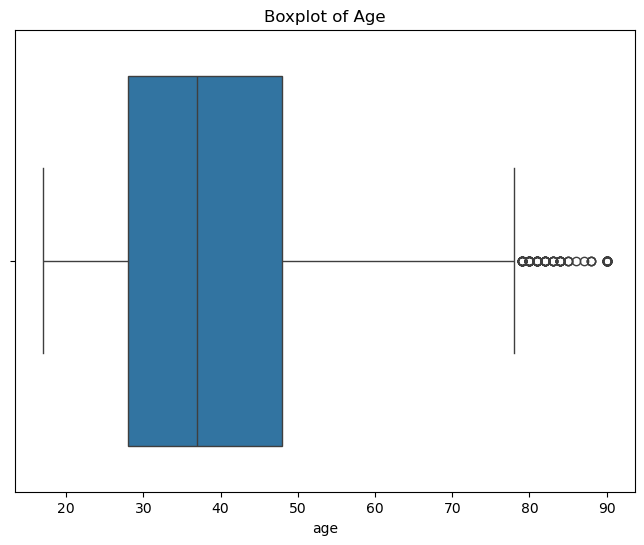

In [10]:
# Identify outliers for age variable 
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['age'])
plt.title("Boxplot of Age")
plt.show()

As we can observe, the median age of the variable is around 40, suggesting that half of the individuals are under 40 years old, while the other half are over 40. 
The distribution of the variable centers around working-age individuals, with fifty percent of individuals falling within the 30-50 age range, highlighting a significant representation of the labor force. 
Outliers, starting at the age threshold of 80, suggest that these individuals are still active participants in the workforce that contributes to the economy

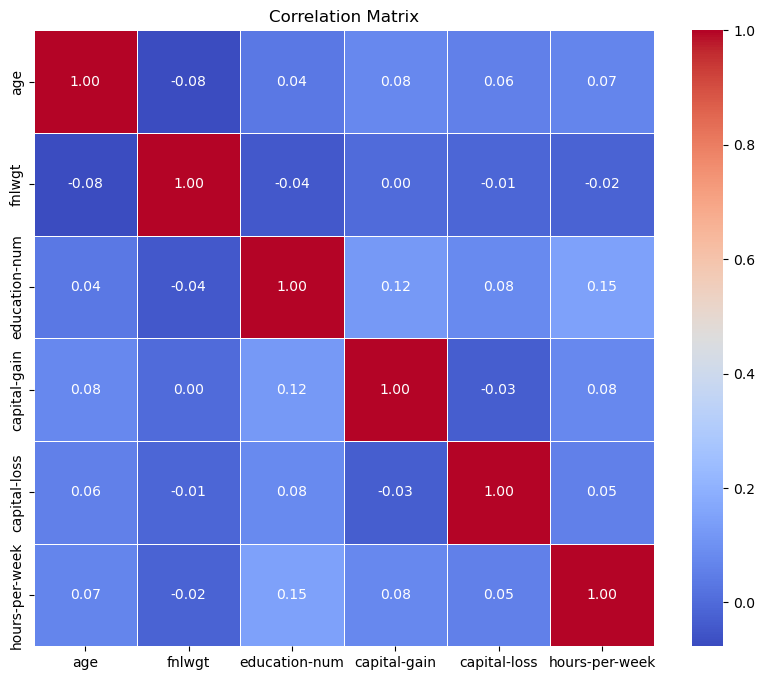

Strongest correlations with 'hours-per-week':
hours-per-week    1.000000
education-num     0.148123
capital-gain      0.078409
age               0.068756
capital-loss      0.054256
Name: hours-per-week, dtype: float64
Weakest correlations with 'hours-per-week':
education-num    0.148123
capital-gain     0.078409
age              0.068756
capital-loss     0.054256
fnlwgt          -0.018768
Name: hours-per-week, dtype: float64


In [11]:
# Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target.

# Select only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numerical_data.corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Strongest and weakest correlations with 'hours-per-week'
corr_with_target = corr_matrix['hours-per-week'].sort_values(ascending=False)

# Display the strongest correlations
print("Strongest correlations with 'hours-per-week':")
print(corr_with_target.head(5))  # Strongest correlations

# Display the weakest correlations
print("Weakest correlations with 'hours-per-week':")
print(corr_with_target.tail(5))  # Weakest correlations


The highest correlation observed is between the variables 'education-num' and 'hours-per-week', with a coefficient of 0.15, indicating a weak positive correlation.

This could mean that individuals with higher education tend to work slightly more hours, but the effect is not strong. Factors like job type or professional status may also influence this. 
 
The weakest correlation observed is with 'fnlwgt' variable. The coefficient is -0.02.

This means that as one of these variables changes, there is very little to no change in the other.

This suggests that there is almost no linear relationship between "hours-per-week" and "fnlwgt".

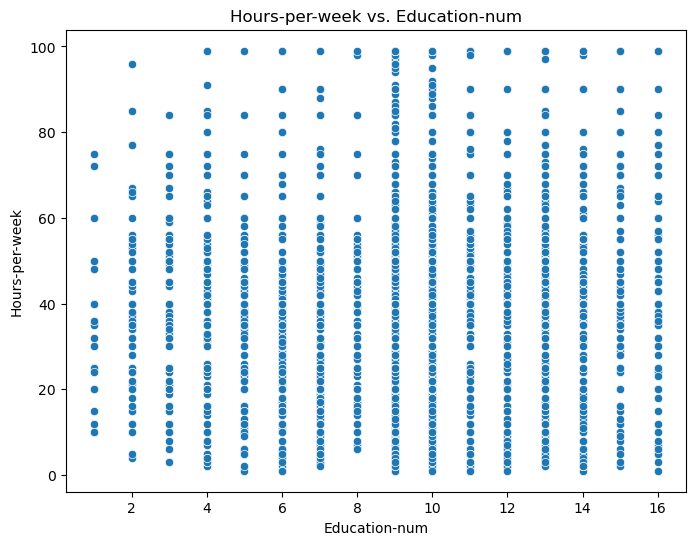

In [12]:
# Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week.
# Scatter plot of hours-per-week vs. education-num
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['education-num'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. Education-num')
plt.xlabel('Education-num')
plt.ylabel('Hours-per-week')
plt.show()

There is no clear trend between the two variables, as the points in the scatter plot are randomly distributed without following an obvious pattern. 

There's a slight tendency for the average "hours-per-week" to increase as "education-num" increases, especially at higher education levels (e.g., 12+ years).


Additionally, a few outliers can be observed across almost all education years.

The scatter plot may indicate that the two variables, education-num  and hours-per-week, are not directly linked. 

There are individuals with high "hours-per-week" values even at lower education levels, indicating that education isn't a limiting factor for working long hours in some cases.

This could mean that factors beyond education level, such as occupation type or work environment, may play a more significant role in determining hours worked per week.


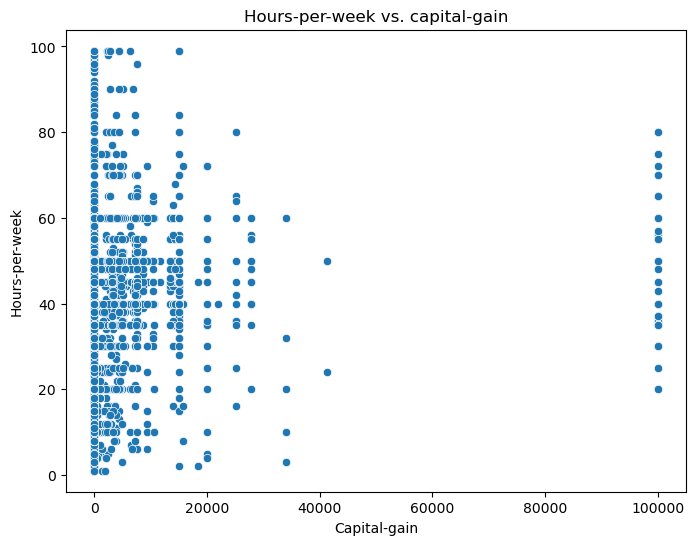

In [13]:
# Scatter plot of hours-per-week vs. capital-gain
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['capital-gain'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. capital-gain')
plt.xlabel('Capital-gain')
plt.ylabel('Hours-per-week')
plt.show()

There is no clear pattern between the two variables, as the points in the scatter plot are randomly distributed, without forming a distinct relationship. 

This suggests that there is no significant link between capital-gain and hours worked per week, with the correlation coefficient being very low, 0.07. 

Additionally, a few outliers are visible across almost all levels of capital-gain, which may indicate unusual or extreme values that do not align with the majority of the data in the dataset

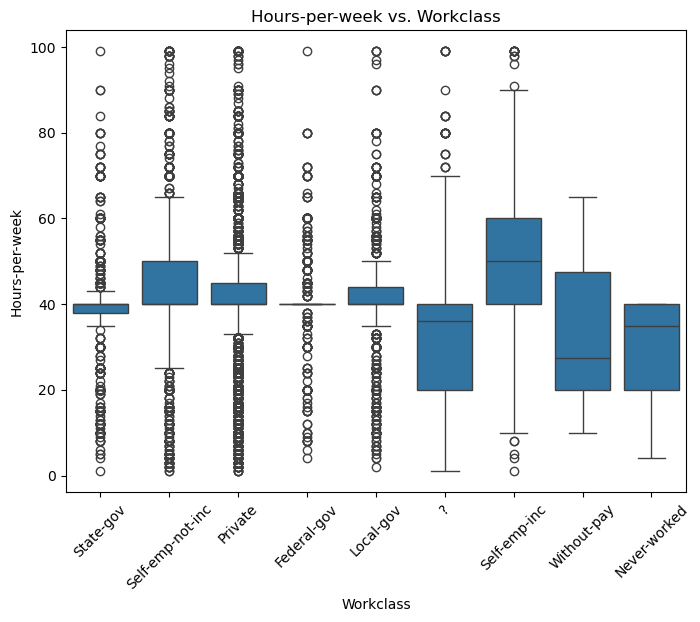

In [14]:
# Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots.
# Boxplot of hours-per-week vs. workclass
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['workclass'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. Workclass')
plt.xlabel('Workclass')
plt.ylabel('Hours-per-week')
plt.xticks(rotation=45)
plt.show()


Between the target variable and workclass, we can observe that individuals classified as self-emp-inc show a high variation in the number of hours worked per week, greater than other categories in the workclass variable. This means that 50% of these individuals work more than the average of 40 hours per week, while the remaining 50% reach up to 100 hours per week.

The state-gov employees category shows that individuals are working an average of around 40 hours per week (Local-gov the same). However, there are extreme values, indicating that some cases do not follow this pattern.

The "?" category and never-worked category illustrates that, in approximately 75% of cases, individuals work fewer than 40 hours per week. Similarly, the without-pay category shows that more than 50% of individuals work less than 40 hours per week.

In other words, individuals classified as self-emp-inc exhibit a fairly high variation in weekly working hours: about 25% of them work up to a maximum of 40 hours per week, 50% work up to 50 hours per week, and the remaining 25% work up to a maximum of 100 hours per week (taking outliers into account).

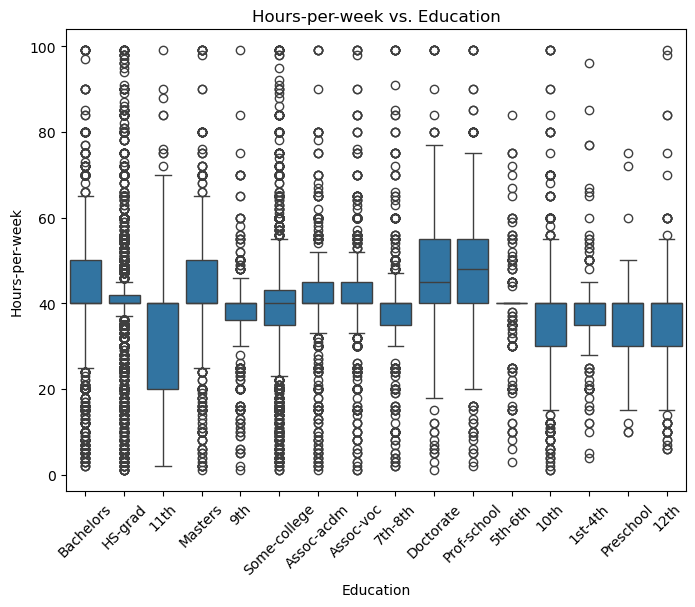

In [15]:
# Boxplot of hours-per-week vs. education
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['education'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. Education')
plt.xlabel('Education')
plt.ylabel('Hours-per-week')
plt.xticks(rotation=45)
plt.show()

Between the target variable and education, we can observe the presence of outliers both on the upper and lower ends.

Many categories of this variable show that the first 25% of individuals work up to 40 hours per week (bachelors, HS-grad, masters, assoc-acdm, assoc-voc, doctorate, prof-school). An interesting case is HS-grad, where the first 25% of individuals work slightly below 40 hours, with a maximum of 50 hours per week (not including the outliers). Similar cases with a low lower limit are found in the categories 9th, assoc-acdm, and assoc-voc.

For individuals with a doctorate, 50% work slightly more than 40 hours per week, while the remaining 50% work up to nearly 80 hours per week. A similar situation is observed in the prof-school category (not including the outliers)

The categories HS-grad, 9th, 7th-8th, 1st-4th, and 5th-6th have the lowest average weekly working hours, slightly above 40 hours. The 5th-6th category has the lowest variability, with most cases concentrated around 40 hours per week, except for outliers that, naturally, do not follow this pattern.

Another interesting observation is related to the 11th category, where 75% of individuals work up to 40 hours per week, while the rest work approximately up to 70 hours per week (excluding outliers). Similar patterns are found in the 10th, 1st-4th, preschool, 12th, 7th-8th, and 9th categories.

In other words, individuals with higher education tend to work more hours per week than those in lower education categories. The category with an average of 40 hours per week is 5th-6th. This suggests that people with higher education levels tend to work longer hours per week.

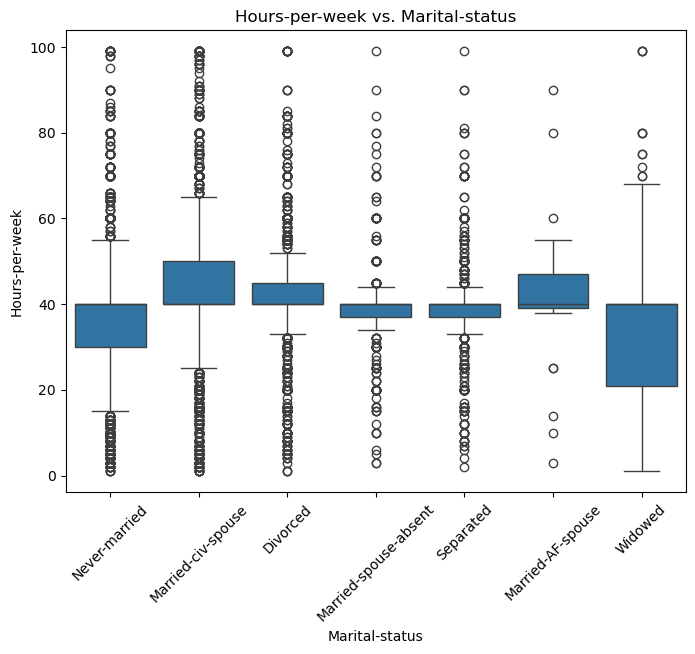

In [16]:
# Boxplot of hours-per-week vs. marital-status
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['marital-status'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. Marital-status')
plt.xlabel('Marital-status')
plt.ylabel('Hours-per-week')
plt.xticks(rotation=45)
plt.show()

Between the target variable and marital-status, we can observe that 75% of individuals in the widowed, never-marrried, married spouse absent and separated categories work up to 40 hours per week, while the remaining 25% work approximately up to 70 hours per week. There are also a few outliers on the upper limit, indicating that this pattern is broken by a few influential cases where individuals work as much as 100 hours per week.

These influential cases can be observed in every category of marital-status, suggesting that the patterns are exceeded by some individuals who either work significantly more or significantly less (for the lower limit).

For those classified as married-civ-spouse, 25% work up to 40 hours per week, while the remaining 75% work between 40 and 70 hours per week (not including the outliers). In the case of married-spouse-absent and separated, the results are similar, with 75% of individuals working up to 40 hours per week and the remaining 25% working up to 50 hours per week (or even 100 hours if we include the oultiers)

In other words, in the married-civ-spouse, divorced and married af spouse category, only 25% of individuals work up to 40 hours per week, while the rest work more. In contrast, for the widowed category, 75% of individuals work up to 40 hours per week. This highlights a clear discrepancy: the married-civ-spouse category includes individuals who tend to work significantly more hours per week compared to the average, whereas the widowed category consists mostly of individuals who work up to 40 hours per week.

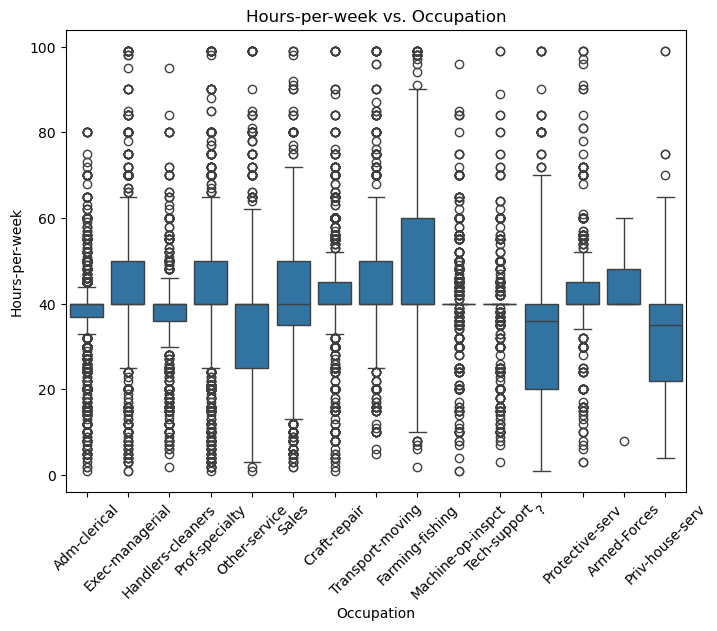

In [17]:
# Boxplot of hours-per-week vs. occupation
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['occupation'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. Occupation')
plt.xlabel('Occupation')
plt.ylabel('Hours-per-week')
plt.xticks(rotation=45)
plt.show()

From the perspective of the target variable and the occupation variable, we can observe that the highest data variability is found within the transport-moving category. Here, the first 25% of cases work approximately between 10 and 40 hours per week, while the remaining 75% can reach up to around 90 hours per week at the upper limit (or even 100 including the outliers). At the lower limit, outliers can be observed, indicating cases where individuals report working 0 hours per week.

The lowest variability (if we are not taking into conssideration the outliers) is found in the farming-fishing and machine-op-inspct categories, with working hours centered around an average of 40 hours per week. However, outliers are also present, deviating from this pattern and suggesting that some individuals work anywhere between 0 and 90-100 hours per week.

For those classified under other-service, 75% of individuals work between 0 and 40 hours per week, while the remaining 25% reach slightly over 60 hours (or even 100 including outliers). This pattern also applies to the priv-house-serv category, where the upper limit is approximately 70 hours per week.

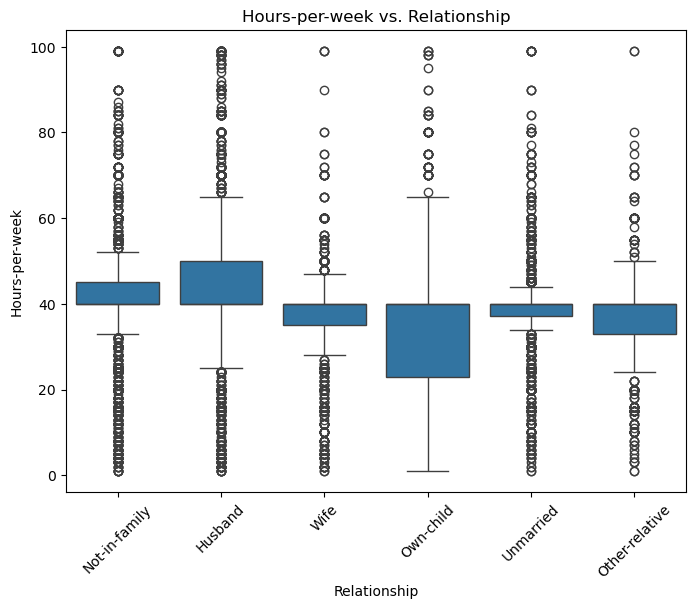

In [18]:
# Boxplot of hours-per-week vs. relationship
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['relationship'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. Relationship')
plt.xlabel('Relationship')
plt.ylabel('Hours-per-week')
plt.xticks(rotation=45)
plt.show()

Between the target variable and the relationship variable, we can identify that in the own-child category, 75% of individuals work up to 40 hours per week, while the remaining 25% work slightly over 60 hours (or even 100 hours including the outliers).

Those in the unmarried category generally work between slightly below 40 hours and just over 40 hours per week, excluding outliers. If we consider outliers, the minimum recorded value is 0 hours worked, while the maximum reaches 100 hours per week.

For individuals categorized as husband, the first 25% work up to 40 hours per week, while the upper limit extends to 70 hours—similar to the own-child category.

In other words, approximately 75% of individuals in the own-child, wife, unmarried, and other-relative categories work up to 40 hours per week. In contrast, in the not-in-family and husband categories, only the first 25% work up to 40 hours per week, while the remaining 75% work more than 40 hours per week. This indicates that individuals in the not-in-family and husband categories tend to work longer hours.

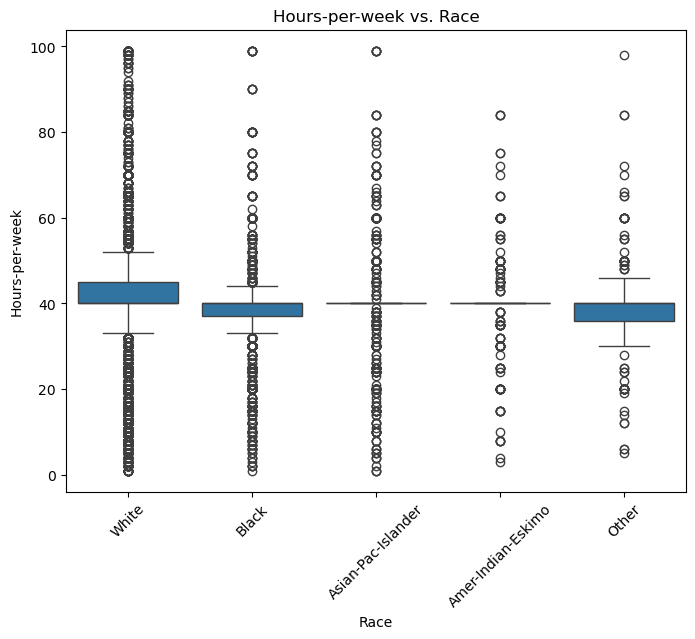

In [19]:
# Boxplot of hours-per-week vs. race
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['race'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. Race')
plt.xlabel('Race')
plt.ylabel('Hours-per-week')
plt.xticks(rotation=45)
plt.show()

In the relationship between the target variable and the race variable, we can identify that in the White category, the first 25% of individuals work up to 40 hours per week, while the remaining 75% work slightly over 50 hours per week (without including the outliers).

In the Asian-Pac-Islander and Amer-Indian-Eskimo categories, the average number of hours worked per week is around 40.

For the Other and Black categories, 75% of individuals work up to 40 hours per week, while the remaining 25% work up to 50 hours (without including the outliers).

Overall, the relationship between the target variable and race suggests that individuals in the White category tend to have the highest variability in working hours, with a significant portion working more than 50 hours per week. In contrast, those in the Asian-Pac-Islander and Amer-Indian-Eskimo categories exhibit the lowest variability, with a consistent average of around 40 hours per week.

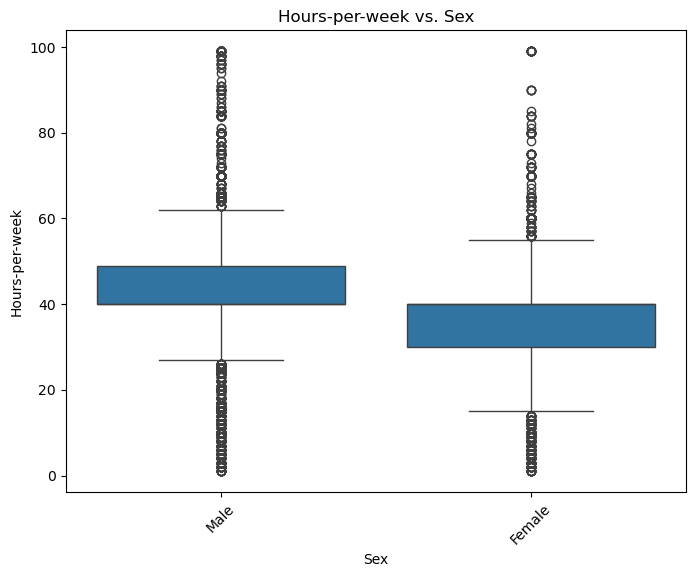

In [20]:
# Boxplot of hours-per-week vs. sex
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['sex'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. Sex')
plt.xlabel('Sex')
plt.ylabel('Hours-per-week')
plt.xticks(rotation=45)
plt.show()

From the perspective of the relationship between the target variable and the sex variable, it can be observed that men generally work more hours than women. The first 25% of men work up to 40 hours per week, while the remaining 75% work between 40 and slightly over 60 hours (not including the outliers).

For women, 75% work up to 40 hours per week, while the remaining 25% work between 40 and up to 60 hours (not including the outliers).

These findings indicate that men tend to work more hours per week than women, with a larger proportion exceeding the 40-hour threshold.

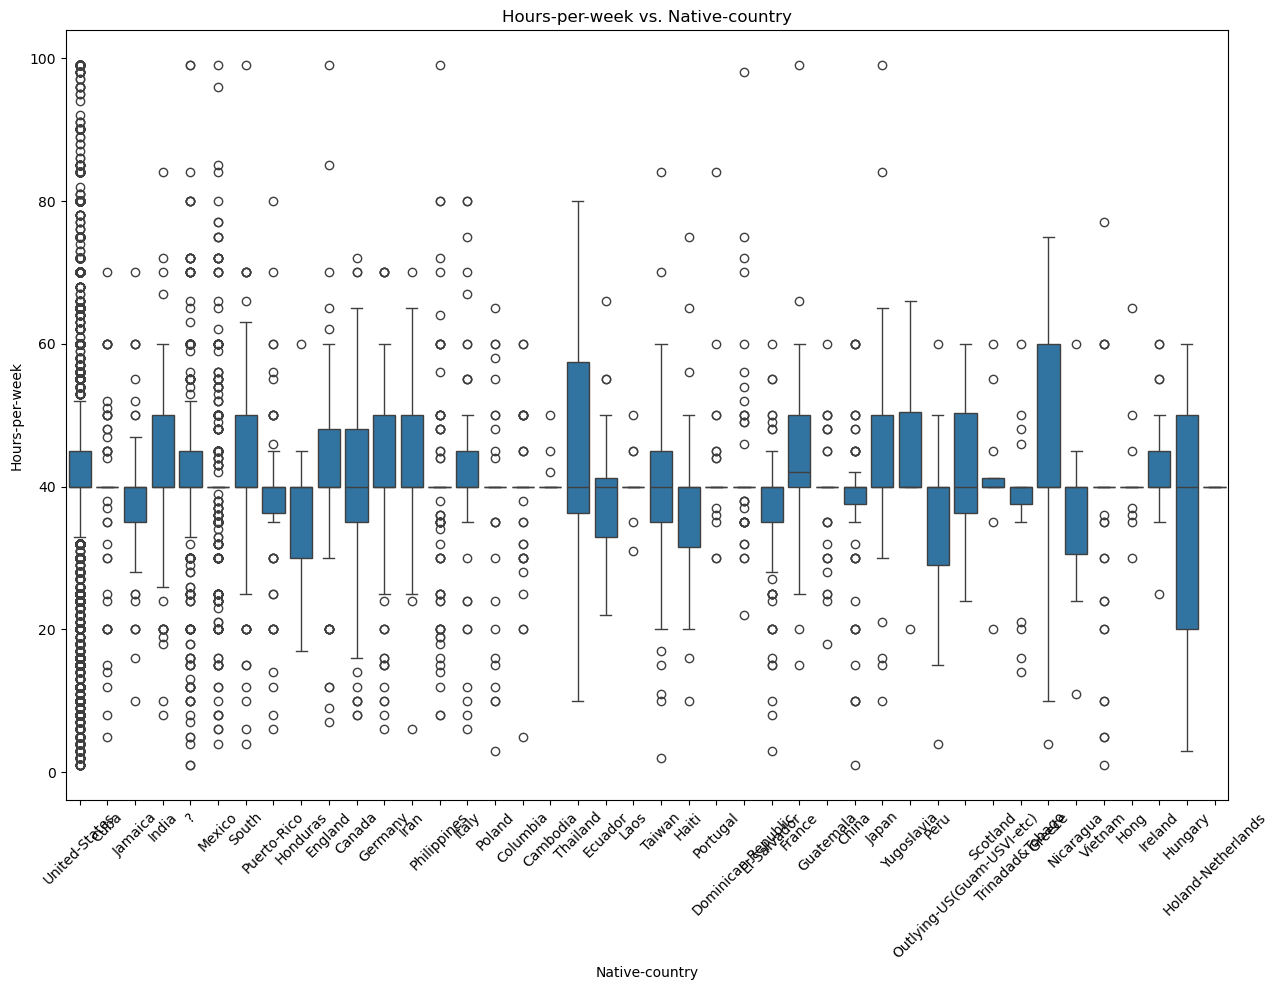

In [32]:
# Boxplot of hours-per-week vs. native-country
plt.figure(figsize=(15, 10))
sns.boxplot(x=data['native-country'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. Native-country')
plt.xlabel('Native-country')
plt.ylabel('Hours-per-week')
plt.xticks(rotation=45)
plt.show()

The relationship between the native-country variable and the target variable shows significant variability in the data.

In Cambodia, 25% of individuals work fewer than 40 hours per week, while 75% work fewer than 60 hours per week. The top 25% work between 60 and 80 hours per week.

In Hungary, the first 25% of individuals work up to 20 hours per week, suggesting that the remaining 75% work between 20 and 60 hours per week. This indicates a greater spread in working hours compared to other countries.

In Jamaica, Puerto Rico, and Honduras, 75% of individuals work up to a maximum of 40 hours per week, while the remaining 25% can work up to 50 hours per week, except for extreme cases, where they may reach even 70-80 hours.

The United States appears to have one of the larger sample sizes, indicated by the density of data points.

Columbia appears to have one of the smallest sample size, with a very small variability, around 40 hours per week with some outliers.

The findings suggest that countries like Cambodia and Hungary have a broader range of working hours, indicating a diverse workforce with either fewer working hours or highly extended workweeks, while countries like Columbia, Poland, Portugal, Laos, Vietnam (etc) tend to have more uniform working patterns. This could reflect differences in economic structures, labor markets, or work culture across these countries.

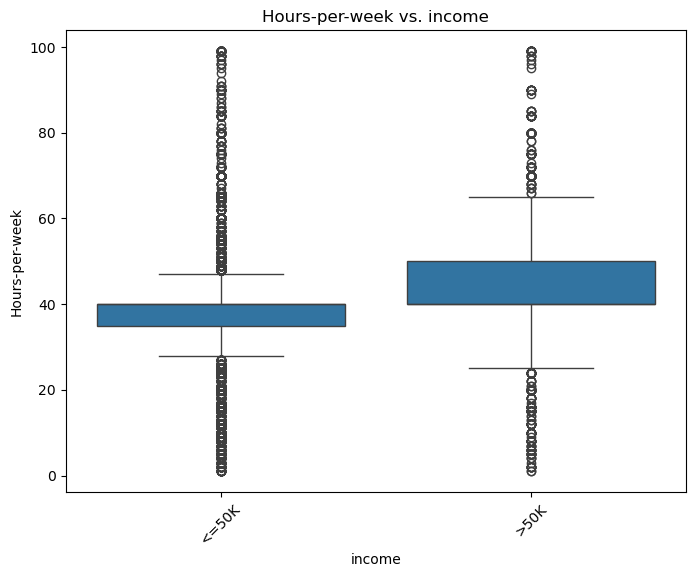

In [22]:
# Boxplot of hours-per-week vs.income
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['income'], y=data['hours-per-week'])
plt.title('Hours-per-week vs. income')
plt.xlabel('income')
plt.ylabel('Hours-per-week')
plt.xticks(rotation=45)
plt.show()

The relationship between the variable 'hours per week' and 'income' suggests that individuals earning more than 50k tend to work longer hours. Only 25% of them work up to 40 hours, while the remaining 75% work up to 70 hours (or even 100 hours including oultiers) 

On the other hand, those earning less than 50k, 75% of them work up to 40 hours, with the remaining 25% working over 40 hours, up to 50 hours (or even 100 including outliers).

So, people with incomes over 50k tend to work more hours per week compared to those with incomes below 50k

In [23]:
# Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation.
import numpy as np
def generate_summary(data):
    # Select only numerical columns for correlation calculation
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Calculate the correlation matrix for numerical columns only
    correlation_matrix = numerical_data.corr()

    # Extract the upper triangle of the correlation matrix without the diagonal
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Unstack and sort values by absolute correlation
    strongest_correlations = upper_triangle.unstack().dropna().abs().sort_values(ascending=False).head(3)

    # Missing values report
    missing_report = data.isnull().sum()

    # Formatting summary
    summary = """
    Exploratory Data Analysis (EDA) Summary:
    - The dataset contains {} rows and {} columns.
    - Missing values found in: {}.
    - The strongest correlations are: 
    {}
    """.format(
        data.shape[0], data.shape[1],
        missing_report[missing_report > 0].index.tolist(),
        strongest_correlations.to_string()
    )
    
    print(summary)

# Call the function with your dataset 'data'
generate_summary(data)




    Exploratory Data Analysis (EDA) Summary:
    - The dataset contains 32561 rows and 15 columns.
    - Missing values found in: [].
    - The strongest correlations are: 
    hours-per-week  education-num    0.148123
capital-gain    education-num    0.122630
capital-loss    education-num    0.079923
    


1.Key Patterns and Trends

Education and Capital-gain: There is a trend where individuals with higher levels of education tend to earn higher incomes, but the correlation coefficient of 0.12 suggests that this relationship is quite weak. This supports the hypothesis that education may influence income, but it is not a strong determinant, and other factors could play a significant role in determining income levels.

Age and Capital Gain/Loss: There is a weak correlation between age and both capital gain and capital loss, suggesting that these financial variables are not strongly dependent on an individual’s age. However, the small positive correlations could imply that older individuals may have more financial investments, resulting in occasional gains or losses.

Hours Worked: The number of hours worked per week shows some variation but is not strongly correlated with most other variables. This indicates that factors other than age or education level might influence how many hours people work, such as job type, economic conditions, or personal preferences.

2. The top three strongest correlations identified in the dataset were:

Education-num and Hours-per-week: The correlation is weak but positive (0.148), indicating that those with higher education might work slightly more hours, but the relationship is not robust enough to be a strong predictor.

Education-num and Capital-gain: A weak positive correlation (0.12) suggests that individuals with higher education levels might have slightly higher capital gains. This could be because higher education is often associated with better financial literacy, higher-paying jobs, or greater access to investment opportunities.

Education-num and Capital-loss: A weak correlation (0.07) indicates that individuals with more years of education may experience minor capital losses. However, this relationship is not strong enough to suggest a clear pattern, meaning that education level alone does not significantly predict capital losses.

3. Areas Requiring Further Investigation

While education and age are sometimes thought to correlate with work hours, the weak correlation suggests that other factors should be examined. 

A deeper investigation into the differences between types of occupation (self-employed, state-gov, private sector, etc.) and the number of hours worked would be insightful. How are the hours distributed within these categories? Is there more flexibility in the work schedule for employees in the private sector compared to those in the public sector?

In the case of the native-country variable, it would be interesting to explore in more detail how the hours worked differ between the various nationalities included, considering the different economies and policies that may influence work behaviors.

Exploring the underlying factors contributing to why men tend to work more hours than women, considering social expectations, family responsibilities, and access to certain types of employment.

4.Unexpected Insights or Anomalies

Low correlation between Education and Hours Worked: A surprising observation is the relatively weak correlation between the number of hours worked per week (hours-per-week) and the level of education (education-num). 

This contradicts the assumption that higher education would lead to longer work hours. Possible reasons could include differences in job types, industries, or personal choices related to work-life balance.

A surprising finding was the relatively low correlation between capital gains and "hours per week," indicating that capital gains do not significantly influence the number of hours worked. 

This suggests that investment income does not correlate with traditional working hours.

5. Concluding Remarks

This exploratory data analysis uncovered several expected trends, such as the relationship between education and income, and some unexpected results, such as the weak correlation between education and hours worked. 

Although the relationships between variables like age, education, and financial gain/loss are interesting, they are not strong enough to suggest causal relationships.

The analysis highlights several areas that warrant further investigation, particularly around income imbalance, the lack of a strong connection between education and work hours, and deeper insights into capital gain/loss. 

Addressing these gaps can lead to a more comprehensive understanding of the dataset, paving the way for more advanced modeling and predictive analyses.

One of the most interesting findings from the analysis of the relationship between the target variable and other variables is the significant variability in working hours based on occupational status and education. 
 Self-employed individuals exhibit a high degree of variability, with some working up to 100 hours per week, while others have shorter schedules. 
 
 In contrast, government employees tend to have a more stable 40-hour workweek. 
 
 Additionally, education level has a relatively small influence on the number of hours worked, men tend to work more hours than women and white people tend to work more hours than the others.
 
 These findings suggest connections between education, gender, and job types, with potential implications for future public policies and economic strategies.